In [1]:
#ch06_01_mnist.ipynb

In [5]:
#step0: 關於MNIST資料集
#The MNIST database contains 60,000 training images and 10,000 testing images.

In [6]:
#step1: 下載MNIST資料集
#step1.1 匯入Keras及其他相關 module
import numpy as np
import pandas as pd
import keras
from keras.utils import np_utils

/Users/vivianvivi/anaconda3/envs/tensorflow/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [7]:
#keras.utils.np_utils keras\utils\np_utils.py Numpy-related utilities.
# 處理 將 label 轉換為 OneHotEncoding

In [8]:
np.random.seed(10)

In [9]:
#np.random.seed
#當我們設置相同的seed，每次生成的隨機數將相同
#也就是說，每次想獲得與上次相同的隨機數，seed後的數字應該相同！

In [10]:
#step1.2 匯入 Keras module中現成的mnist dataset
from keras.datasets import mnist

In [11]:
#step1.3 第一次執行下載 mnist dataset, mnist.load_data()
(X_train_image, Y_train_label),(X_test_image, Y_test_label)=mnist.load_data()

In [10]:
#step1.4 查看mnist資料
print('train data=',len(X_train_image)) #train 資料集 60000筆
print('test data=',len(X_test_image))   #test 資料集 10000筆

train data= 60000
test data= 10000


In [14]:
#step2 查看訓練資料

In [15]:
#step2.1 訓練資料是由 images 與 labels 所組成, 共有60000筆
#        每個 image 是 28x28 , 每個 label 是 (0,1,2,......9)

In [12]:
print('X_train_image:',X_train_image.shape)
print('Y_train_label:',Y_train_label.shape)

X_train_image: (60000, 28, 28)
Y_train_label: (60000,)


In [13]:
X_train_image[0].shape #檢視第一個 image 資料

(28, 28)

In [14]:
X_train_image[0] #28x28 , 值域:0~255

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [15]:
Y_train_label[0] #檢視第一個 label 資料

5

In [16]:
#step2.2 將images 資料以圖形顯示
#step2.2.a 定義繪圖函數 plot_image()
import matplotlib.pyplot as plt
def plot_image(image):
    fig = plt.gcf()
    fig.set_size_inches(2, 2)
    plt.imshow(image, cmap='binary')
    plt.show()

In [17]:
#matplotlib.pyplot.gcf(), Get a reference to the current figure.
#set_size_inches(w, h=None, forward=True) method, Set the figure size in inches
#matplotlib.pyplot.imshow, https://matplotlib.org/api/pyplot_api.html?highlight=imshow#matplotlib.pyplot.imshow

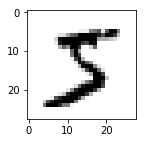

In [18]:
#step2.2.b 執行 plot_image() 查看第0筆image
plot_image(X_train_image[0])

In [19]:
#step2.2.c 查看第0筆labels資料
Y_train_label[0]

5

In [20]:
#step3: 查看多筆訓練資料images與label

In [21]:
#step3.1 建立看多筆資料函數 plot_images_labels_prediction()

In [22]:
import matplotlib.pylab as plt
def plot_images_labels_prediction(images,labels,prediction,idx,num=10):
    fig=plt.gcf() 
    fig.set_size_inches(12,14)      #設定顯示圖形為12"x14" 
    if num>25: num=25               #如果顯示筆數大於25,就設定為25
    for i in range(0,num):          #畫出num個數字圖形
        ax=plt.subplot(5,5,1+i)     #subplot(nrows, ncols, plot_number), plot_number starts at 1, increments across rows first and has a maximum of nrows * ncols.
        ax.imshow(images[idx], cmap='binary') #show 第 [idx] 個 images, colormap='binary'
        title="label="+str(labels[idx])       #此一subplot抬頭為對應的label值
        if len(prediction)>0:                      #如果呼叫此函數時,有給定預測值prediction (a list)
            title+=",predit="+str(prediction[idx]) #   在抬頭加上對應的預測值 prediction[idx]
        
        ax.set_title(title,fontsize=10)  #設定subplot ax 的 title
        ax.set_xticks([]);ax.set_yticks([]) #set_xticks(ticks, minor=False), Set the x ticks with list of ticks, 此處[]為不設定刻度
        idx+=1
    plt.show()     

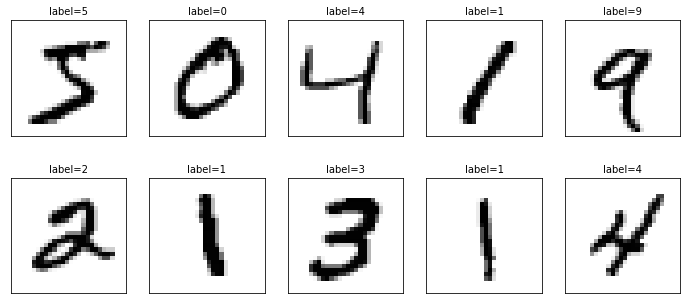

In [23]:
#step3.2 查看訓練資料前10筆資料, plot_images_labels_prediction(), prediction=[], idx=0, num=10
plot_images_labels_prediction(X_train_image,Y_train_label,[],0,10)

In [24]:
#step3.3 查看 test 測試資料, 10000筆
print('X_test_image:',X_test_image.shape)
print('Y_test_label:',Y_test_label.shape) 

X_test_image: (10000, 28, 28)
Y_test_label: (10000,)


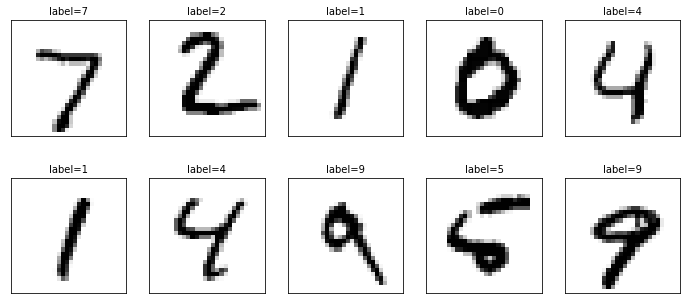

In [38]:
#ste3.3.a 以plot_images_labels_prediction() 檢視test前10筆資料
plot_images_labels_prediction(X_test_image,Y_test_label,[],0,10)